<a href="https://colab.research.google.com/github/preetha30/datavisualization/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn. model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier


In [32]:
df = pd.read_csv("scores.csv")
df.head()
for coln in df:
  df[coln]=df[coln].astype('category').cat.codes


In [36]:
x=df[['Python','Sql','Tableau','Excel']]
y=df[['Student Placed']]
x_train,y_train,x_test,y_test = train_test_split(x,y,test_size =10,random_state =0)

#standard =preprocessing.scale(x_train)
#standard2 =preprocessing.scale(y_train)
#print(standard,standard2)
print(y_test)


     Student Placed
18                1
170               1
107               1
98                1
177               1
182               0
5                 0
146               0
12                0
152               0


In [14]:
x = df.iloc[:,[1,2]]
y = df.iloc[:,5]
print(x,y)

      Sql    ML
0    0.57  0.63
1    0.90  0.62
2    0.69  0.62
3    0.94  0.60
4    0.87  1.00
..    ...   ...
195  0.13  0.78
196  0.49  0.19
197  0.65  0.62
198  0.99  0.66
199  0.23  0.97

[200 rows x 2 columns] 0      Yes
1       No
2       No
3       No
4       No
      ... 
195    Yes
196    Yes
197    Yes
198    Yes
199    Yes
Name: Student Placed, Length: 200, dtype: object


In [37]:
st_x= StandardScaler()
x_train =st_x.fit_transform(x_train)
y_train = st_x.transform(y_train)

In [51]:
print(x,y)

     Python  Sql  Tableau  Excel
0        69   49       40     31
1        70   78       57     84
2        43   60       52     37
3        37   82       21     43
4        29   76       19     89
..      ...  ...      ...    ...
195      41   10        8     11
196      12   44       25     78
197      83   56       60     56
198      53   87       57     85
199      75   20       36     38

[200 rows x 4 columns]      Student Placed
0                 1
1                 0
2                 0
3                 0
4                 0
..              ...
195               1
196               1
197               1
198               1
199               1

[200 rows x 1 columns]


In [53]:
classifier=DecisionTreeClassifier(criterion ='entropy',random_state=0)
#lab_enc = preprocessing.LabelEncoder
#encoded =lab_enc.fit_transform(y_train)

classifier.fit(x,y)

y_pred = classifier.predict(x)



In [ ]:
lab = preprocessing.LabelEncoder()

In [50]:
df = pd.read_csv("scores.csv")
df.head()
for coln in df:
  df[coln]=df[coln].astype('category').cat.codes
x=df[['Python','Sql','Tableau','Excel']]
y=df[['Student Placed']]
x_train,y_train,x_test,y_test = train_test_split(x,y,test_size =10,random_state =0)

standard =preprocessing.scale(x_train)
standard2 =preprocessing.scale(y_train)
print(standard,standard2)
print(y_test)
st_x= StandardScaler()
x_train =st_x.fit_transform(x_train)
y_train= st_x.transform(y_train)
classifier=DecisionTreeClassifier(criterion ='entropy',random_state=0)
#lab_enc = preprocessing.LabelEncoder
#encoded =lab_enc.fit_transform(y_train)

classifier.fit(x,y)

x_pred = classifier.predict(x)
print(x_pred)



[[-8.58148172e-01 -3.59096454e-01  1.65043291e+00  7.33107521e-01]
 [ 1.01728833e+00  6.73462615e-01  4.24065085e-01  1.26957685e+00]
 [-1.16434189e+00  1.17469271e-01 -9.65818450e-01  1.07798066e+00]
 [-1.30938101e-01 -9.15089798e-01 -6.79665958e-01 -1.18285436e+00]
 [ 5.19723541e-01  3.16038322e-01 -1.48239900e-01 -1.68100445e+00]
 [-1.47053560e+00  9.91173098e-01 -3.52634538e-01  5.41511332e-01]
 [-1.62363246e+00 -5.97379316e-01 -1.41548665e+00 -2.24873421e-01]
 [-8.19873958e-01  8.32317857e-01  1.36428042e+00  1.61444999e+00]
 [ 1.05556254e+00  5.14607374e-01 -3.52634538e-01 -1.52772750e+00]
 [-7.43325530e-01  1.17469271e-01  6.28459722e-01 -7.99661986e-01]
 [ 1.43830468e+00 -3.59096454e-01  9.96370070e-01  8.16804803e-02]
 [ 4.81449327e-01 -1.15337266e+00  6.28459722e-01  8.16804803e-02]
 [-1.69212316e-01  1.15002834e+00 -1.21109202e+00 -8.37981224e-01]
 [ 1.05556254e+00  1.22945596e+00 -4.34392393e-01  2.73276669e-01]
 [ 1.55312733e+00  3.80416499e-02  9.70336648e-02 -8.76300462e

In [54]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y,y_pred)
cm

array([[ 84,   0],
       [  0, 116]])

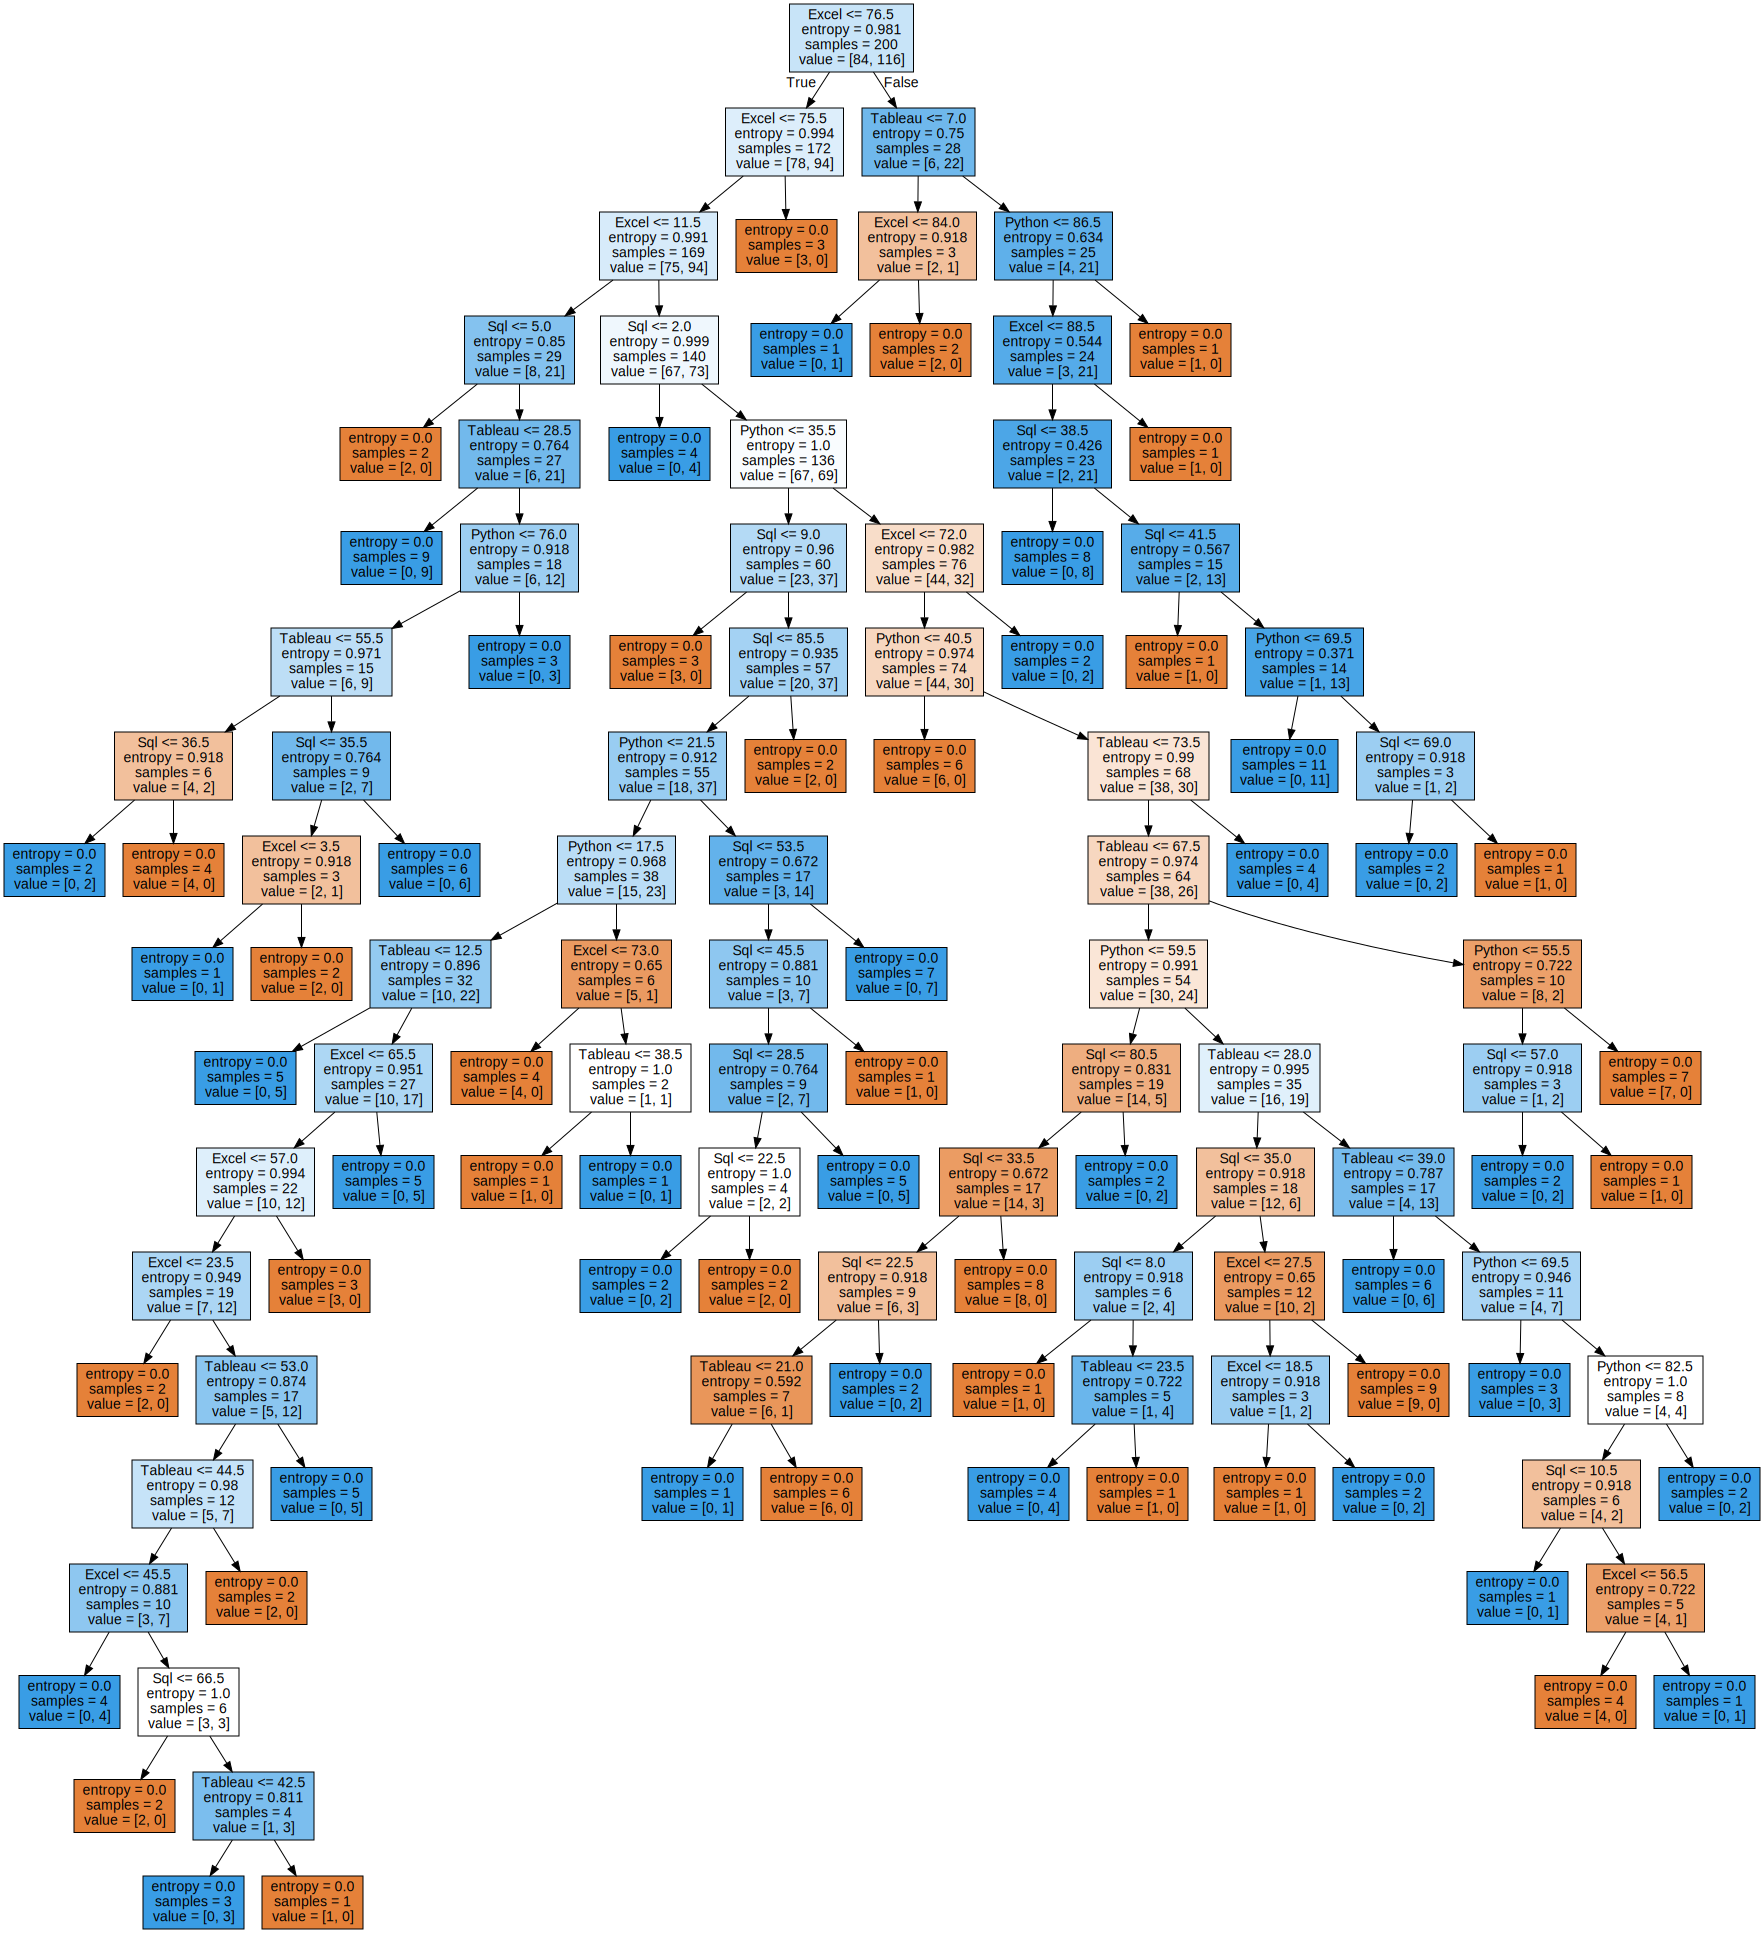

In [60]:
from sklearn.tree import export_graphviz
import graphviz
graphviz.Source(export_graphviz(classifier,feature_names=x.columns,filled = True,))